In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
transform = transforms.Compose([
        transforms.ToTensor(),
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

In [4]:
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 10), # MNIST images shape : 28x28
            nn.PReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(10, 28 * 28), 
            nn.PReLU(),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [6]:
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
num_epochs = 10

model.train()
for epoch in range(num_epochs):
    for images, _ in train_loader:
        
        images = images.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs, images.view(images.size(0), -1))
        
        loss.backward()
        
        optimizer.step()
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}')

print('Training Complete')

Epoch [1/10], Training Loss: 0.0299
Epoch [2/10], Training Loss: 0.0355
Epoch [3/10], Training Loss: 0.0310
Epoch [4/10], Training Loss: 0.0273
Epoch [5/10], Training Loss: 0.0278
Epoch [6/10], Training Loss: 0.0301
Epoch [7/10], Training Loss: 0.0289
Epoch [8/10], Training Loss: 0.0288
Epoch [9/10], Training Loss: 0.0306
Epoch [10/10], Training Loss: 0.0294
Entraînement terminé!


In [10]:
# Test
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        break

# Images reconstruites

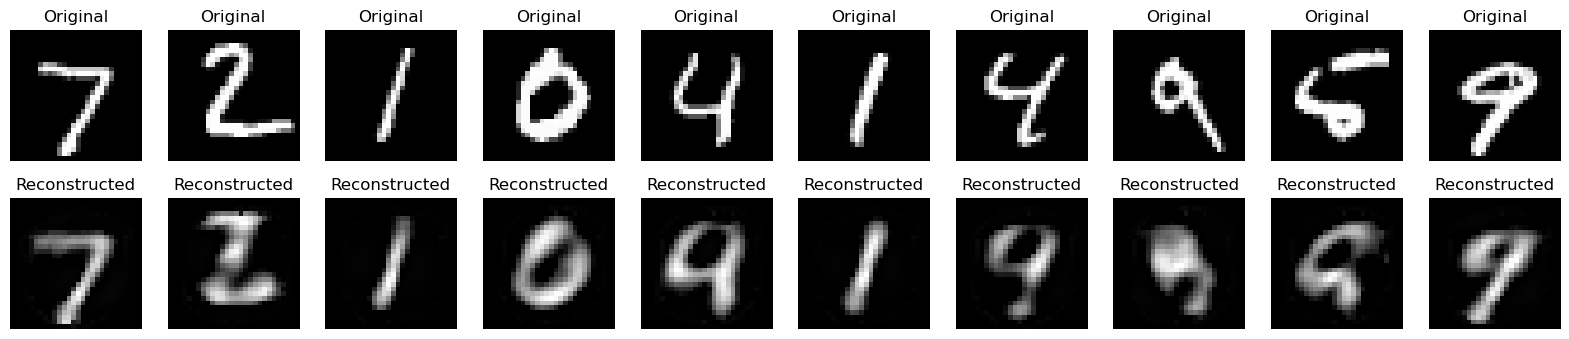

In [11]:
import matplotlib.pyplot as plt

images_cpu = images.cpu().detach()
outputs_cpu = outputs.cpu().detach() 

plt.figure(figsize=(20, 4))

for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(images_cpu[i].view(28, 28).numpy(), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(2, 10, i + 11)
    plt.imshow(outputs_cpu[i].view(28, 28).numpy(), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

Le nombre minimal de neurones à mettre entre l'encodeur et le décodeur est d'environ 10 : on peut voir que les images subissent des déformations à partir de ce seuil.